# Regressão linear simples

## Base plano saúde

#### Importe as bibliotecas 

In [ ]:
!pip install plotly --upgrade

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Leia o dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving plano_saude.csv to plano_saude.csv


In [3]:
base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


#### Separe os valores que queremos prever

In [4]:
X_plano_saude = base_plano_saude.iloc[:,0].values 

In [5]:
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [7]:
y_plano_saude = base_plano_saude.iloc[:,1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

#### Correlação

In [8]:
np.corrcoef(X_plano_saude,y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

<function matplotlib.pyplot.show>

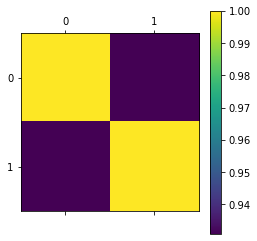

In [10]:
plt.matshow(base_plano_saude.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show

#### Formato do dado

In [13]:
X_plano_saude.shape

(10, 1)

In [12]:
X_plano_saude = X_plano_saude.reshape(-1,1)


#### Crie o modelo e aplique aos dados 

In [15]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Encontre onde a regressão linear intercepta o eixo Y e o coeficiente angular

In [16]:
regressor_plano_saude.intercept_

-558.9490909090912

In [17]:
regressor_plano_saude.coef_

array([61.86787879])

#### Faça o predict e o plot da regressão

In [19]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [20]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [21]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)

In [22]:
grafico

In [23]:
grafico.add_scatter(x= X_plano_saude.ravel(), y= previsoes, name = 'Regressão')

#### Preveja novos valores que não estão no dataset

In [26]:
print(f'y={regressor_plano_saude.intercept_} + {regressor_plano_saude.coef_[0]}x')

y=-558.9490909090912 + 61.867878787878794x


In [27]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [30]:
round(regressor_plano_saude.score(X_plano_saude, y_plano_saude)*100,3)

86.661

#### Plot do gráfico residual

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



<bound method Visualizer.poof of ResidualsPlot(alpha=0.75,
              ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7ba414610>,
              hist=True, line_color=None, model=None, test_color=None,
              train_color=None)>

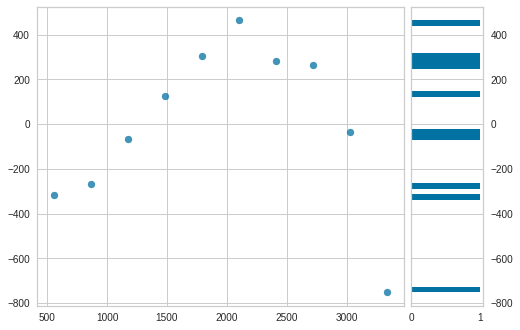

In [31]:
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(regressor_plano_saude)
viz.fit(X_plano_saude, y_plano_saude)
viz.poof